In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
#Importing the test Dataset
dataset_full_test = pd.read_csv('azure_wq_test_entire_dataset.csv')
dataset_full_test = dataset_full_test[['datetime','temp', 'cond', 'do', 'turb', 'chl-a']]
dataset_full_test.sort_index()
print(dataset_full_test.shape)
dataset_full_test.tail()

(1703, 6)


,datetime,temp,cond,do,turb,chl-a
1698,2019-10-07 09:28:57,28.85450,114.8247,4.183043,233.6058,756.1524
1699,2019-10-07 09:43:57,28.86032,114.9700,4.145543,162.0830,700.5317
1700,2019-10-07 12:13:57,28.91764,114.6542,4.948326,198.8478,705.6551
1701,2019-10-07 12:43:57,28.95679,115.1583,5.223165,205.1799,707.6824
1702,2019-10-08 14:44:46,28.89604,115.3140,6.730115,239.6638,1059.8350


In [3]:
#Preparing Input & Output Features
X = dataset_full_test[:]
Y = X.pop('chl-a')
print(X.shape)
print(Y.shape)
Y.head()

(1703, 5)
(1703,)


0    39.64875
1    40.57396
2    40.88269
3    47.05107
4    59.39921
Name: chl-a, dtype: float64

# LightGBM

In [6]:
#if fails, use the yml file to update the environment using  'conda env update --file local.yml --prune'
# then install cloudpickle using 'conda install -c conda-forge/label/cf202003 cloudpickle'
#Loading the model
filename = 'lgbm_model.pkl'
entire_ds_model = pickle.load(open(filename, 'rb'))

In [7]:
#Testing the model on test dataset
result = entire_ds_model.score(X,Y)
predicted_Y = pd.DataFrame(entire_ds_model.predict(X))
print(result)
print('R2: %f' % (r2_score(Y, predicted_Y)))
print('MAE: %f' % (mean_absolute_error(Y, predicted_Y)))
print('MAE: %f' % (mean_squared_error(Y, predicted_Y, squared=False))) 



0.9890946296486066
R2: 0.989095
MAE: 13.898911
MAE: 26.618131


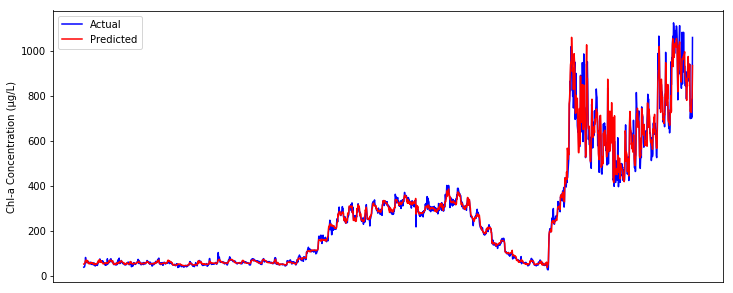

In [8]:
plt.figure(figsize=(12,5))

plt.ylabel('Chl-a Concentration (µg/L)')

plt.plot(Y, color='blue', label = 'Actual')

plt.plot(predicted_Y, color='red', label = 'Predicted')

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.legend()
plt.show()

# RF

In [9]:
#Loading the model
filename = 'rf_model.pkl'
entire_ds_model = pickle.load(open(filename, 'rb'))

In [10]:
#Testing the model on test dataset
result = entire_ds_model.score(X,Y)
predicted_Y = pd.DataFrame(entire_ds_model.predict(X))
print(result)
print('R2: %f' % (r2_score(Y, predicted_Y)))
print('MAE: %f' % (mean_absolute_error(Y, predicted_Y)))
print('MAE: %f' % (mean_squared_error(Y, predicted_Y, squared=False))) 



0.9796036978980968
R2: 0.979604
MAE: 17.491467
MAE: 36.402656


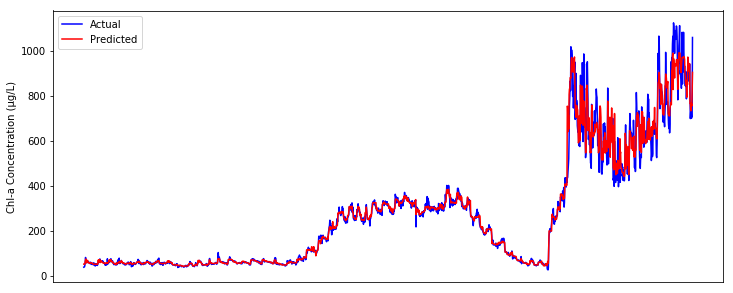

In [11]:
plt.figure(figsize=(12,5))

plt.ylabel('Chl-a Concentration (µg/L)')

plt.plot(Y, color='blue', label = 'Actual')

plt.plot(predicted_Y, color='red', label = 'Predicted')

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.legend()
plt.show()

# XGBoost

In [12]:
#Loading the model
filename = 'xgboost_model.pkl'
entire_ds_model = pickle.load(open(filename, 'rb'))

In [13]:
#Testing the model on test dataset
result = entire_ds_model.score(X,Y)
predicted_Y = pd.DataFrame(entire_ds_model.predict(X))
print(result)
print('R2: %f' % (r2_score(Y, predicted_Y)))
print('MAE: %f' % (mean_absolute_error(Y, predicted_Y)))
print('MAE: %f' % (mean_squared_error(Y, predicted_Y, squared=False))) 



0.9776201998861915
R2: 0.977620
MAE: 20.841458
MAE: 38.131637


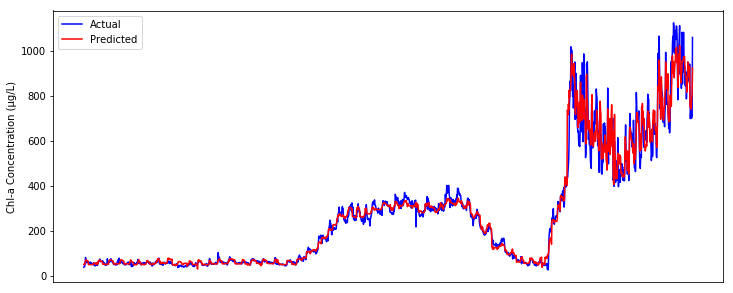

In [14]:
plt.figure(figsize=(12,5))

plt.ylabel('Chl-a Concentration (µg/L)')

plt.plot(Y, color='blue', label = 'Actual')

plt.plot(predicted_Y, color='red', label = 'Predicted')

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.legend()
plt.show()